In [1]:
import re
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib notebook 



In [2]:
TFtable = []
hits_list = []
with open('/Users/bergeric/Projects/s2rnai/data/hitcount.txt') as g: 
    for line in g:
        if not line.strip().startswith('1 ##gff-version'):
            hits = int(line.split()[0])
            hits_list.append(hits)
            TF = line.split()[1]
            if hits > 100:
                TFtable.append((TF))

hitdf = pd.DataFrame(TFtable, columns=['TF'])


hitdf.head()

,TF
0,FBgn0000008
1,FBgn0000014
2,FBgn0000015
3,FBgn0000017
4,FBgn0000024


In [2]:
table = []
with open('/Users/bergeric/Projects/s2rnai/data/motif_alignments_dmmpmm2009_dm6.gff') as f:
    for line in f: 
        if not line.startswith('##'):
            broken = line.split('\t')
            pattern = broken[8].split(';')[3]
            qval = float(pattern[7:].strip())
            TF = broken[8].split(';')[0][5:]
            gene = broken[0]
            stuff = (TF, gene, qval)
            table.append(stuff)

In [3]:
df= pd.DataFrame(table, columns=['TF', 'gene', 'q-value'])
df.head()

,TF,gene,q-value
0,bcd,FBgn0031208,1.0
1,bcd,FBgn0031208,1.0
2,bcd,FBgn0002121,1.0
3,bcd,FBgn0002121,1.0
4,bcd,FBgn0002121,1.0


In [4]:
grp1 = df.groupby('TF')
grp1.describe()

q-value                                                            
           count      mean           std     min    25%    50%    75%    max
TF                                                                          
Deaf1    91200.0  0.968581  4.096314e-02  0.7870  0.980  0.980  0.980  1.000
Dfd      46418.0  0.457459  4.850480e-02  0.4080  0.408  0.456  0.499  0.545
Dref     50440.0  0.812940  1.229978e-01  0.3210  0.794  0.831  0.909  0.912
Eip74EF  47294.0  0.828811  1.358638e-02  0.7910  0.832  0.832  0.832  0.856
Kr       90542.0  0.973808  5.993782e-02  0.6660  0.995  1.000  1.000  1.000
Mad      95051.0  0.724356  1.122301e-02  0.6930  0.716  0.716  0.730  0.744
Med      99330.0  0.480360  7.607670e-02  0.2610  0.464  0.503  0.531  0.564
Trl      99997.0  0.256381  1.217662e-01  0.0115  0.160  0.282  0.364  0.409
bcd      87925.0  1.000000  0.000000e+00  1.0000  1.000  1.000  1.000  1.000
br-Z1    33402.0  0.431065  1.031724e-01  0.3480  0.348  0.348  0.558  0.673
br-Z2    43914.0  0.938533  5.405343e-02  0.8910  0.891  0.891  1.000  1.000
br-Z3    72541.0  0.366011  1.022824e-04  0.3660  0.366  0.366  0.366  0.367
br-Z4    62412.0  0.511732  3.250991e-02  0.4980  0.498  0.498  0.498  0.594
brk      78103.0  0.708316  6.641431e-02  0.6290  0.629  0.702  0.782  0.822
byn      80670.0  0.774775  1.049406e-01  0.6650  0.665  0.791  0.887  0.978
cad      51928.0  0.435750  2.546537e-02  0.3950  0.431  0.451  0.451  0.476
dl       93844.0  0.522556  3.027505e-02  0.3080  0.504  0.512  0.540  0.585
en       47321.0  0.458631  1.819811e-02  0.4500  0.450  0.450  0.450  0.497
eve      93966.0  0.632706  1.233849e-01  0.5110  0.511  0.637  0.700  0.832
ftz      82421.0  0.547225  1.207593e-01  0.3930  0.393  0.582  0.659  0.683
grh      56134.0  1.000000  0.000000e+00  1.0000  1.000  1.000  1.000  1.000
gt       82507.0  0.900919  3.501453e-02  0.8870  0.887  0.887  0.887  0.989
hb       63824.0  0.199397  2.354730e-02  0.1750  0.175  0.198  0.220  0.239
kni      56085.0  0.545983  1.553716e-02  0.2820  0.545  0.549  0.551  0.553
ovo      64088.0  1.000000  0.000000e+00  1.0000  1.000  1.000  1.000  1.000
prd      92679.0  1.000000  0.000000e+00  1.0000  1.000  1.000  1.000  1.000
sd       53503.0  0.383548  4.982569e-02  0.2370  0.343  0.393  0.426  0.445
slbo     54201.0  0.567973  3.504509e-02  0.5300  0.537  0.541  0.600  0.640
sna      87999.0  0.874233  1.279306e-01  0.3940  0.824  0.910  0.972  1.000
tin      64412.0  0.735487  3.626475e-02  0.6880  0.688  0.750  0.775  0.775
tll      94294.0  0.564640  6.079125e-02  0.4770  0.561  0.561  0.596  0.671
ttk      49970.0  0.975000  1.110234e-16  0.9750  0.975  0.975  0.975  0.975
twi      93186.0  0.871655  5.421713e-02  0.7810  0.822  0.908  0.908  0.923
vvl      38083.0  1.000000  0.000000e+00  1.0000  1.000  1.000  1.000  1.000
z        61658.0  0.917000  1.110232e-16  0.9170  0.917  0.917  0.917  0.917

In [167]:
indexTF = df.set_index(['TF'])
df2 = df[["TF","q-value"]]
#sub = df2.iloc[:5000,:]
groups = df2.groupby(['TF'])
print(groups['q-value'])

###### zip(df2, axes.flatten())


<IPython.core.display.Javascript object>


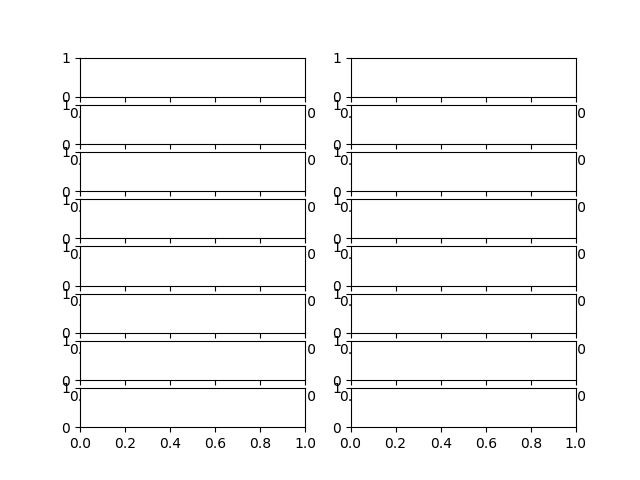

In [30]:
fig, axes = plt.subplots(8,2)

<IPython.core.display.Javascript object>


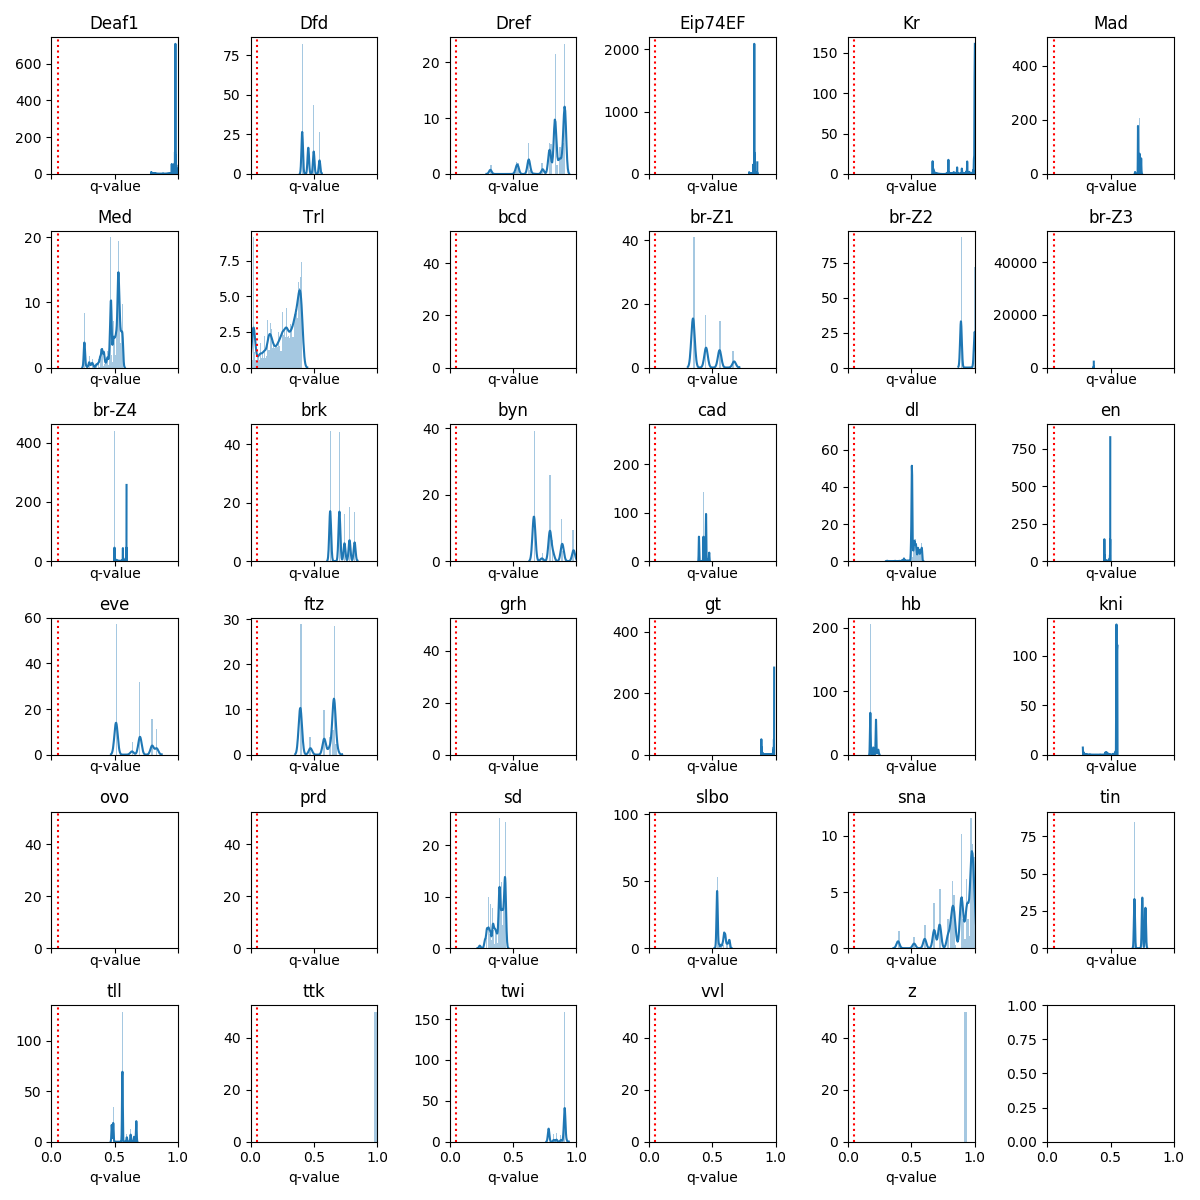

/Users/bergeric/miniconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/Users/bergeric/miniconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


In [192]:
x= groups['q-value']

fig, axes = plt.subplots(6,6, figsize=(12,12), sharex=True)
#axr = axes.ravel()

#zip(groups, axes.flatten())
for ax, x in zip(axes.flat, x):
    sb.distplot(x[1], ax=ax)
    ax.set_title(x[0])
    ax.axvline(0.05, color='r', ls=':')
    #axes.flat[-1].set_visible(False)
ax.set_xlim(0,1)
plt.tight_layout()

<IPython.core.display.Javascript object>


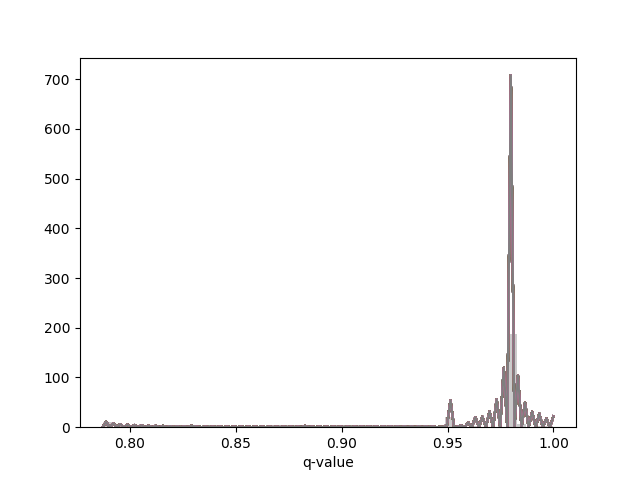

e


TypeError: string indices must be integers

In [80]:
fig, ax = plt.subplots(1, 1)
print(x[1])
sb.distplot(x[1]['q-value'], hist=False, ax=ax, )
ax.set_title(x[0])
ax.axvline(0.05, color='r', ls=':')

In [55]:
plt.gca()
plt.show()